<a href="https://colab.research.google.com/github/machadowma/DividendYieldLinearRegression/blob/master/DividendYieldLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Análise de Dividendos de Ações na Bolsa de Valores Utilizando Regressão Linear

O presente trabalho utiliza *Linear Regression* sobre a cotação e o retorno em dividendos de ações na bolsa de valores para encontrar as empresas que oferecem maior retorno em dividendos para o valor investido. Os resultados demonstram que existe relação linear entre a cotação das ações e o total de dividendos pagos e que é possível encontrar as ações que apresentam Dividend yield mais atrativo.

# Introdução





Conforme estudo divuldado pela B3 [[8]](http://www.b3.com.br) em 2020, o marco de 2 milhões de investidores pessoa física foi atingido em abril do mesmo ano. De forma geral, o perfil dos novos investidores na bolsa de valores brasileira é de jovens que se preocupam em diversificar seus investimentos e demonstram uma visão de longo prazo [[1]](http://www.b3.com.br/pt_br/noticias/pessoa-fisica.htm).

Conforme Tiago Reis, fundador da Suno Research, uma estratégia eficaz para se obter lucros no longo prazo é  investir em ações com foco em dividendos [[2]](https://www.sunoresearch.com.br/artigos/investir-em-dividendos/), que são os pagamentos realizados por empresas a seus acionistas, geralmente trimestralmente ou semestralmente [[3]](https://www.schwab.com/active-trader/insights/content/dividend-yield-and-dividend-growth-fundamental-value-analytics).

Contudo, a escolha da ação a ser comprada demanda estudo minucioso de diversas métricas, como ROE, PL, EBITDA e nível de endividamento [[4]](https://www.youtube.com/watch?v=ARHsj34MDKw). Entre as diversas métricas existentes para analizar uma ação, o *Dividend Yield*, que resulta da divisão dos dividendos pagos nos últimos doze meses pela cotação atual da ação [[5]](https://www.sunoresearch.com.br/artigos/dividendos/#9), é bastante utilizado pelos investidores. Décio Bazin sugere que o investidor procure empresas que paguem mais de 6% de *Dividend Yield* [[6]](https://www.sunoresearch.com.br/artigos/resenha-de-livro-faca-fortuna-com-acoes-antes-que-seja-tarde-de-decio-bazin/). Ademais, Louise Barsi, filha do investidor e bilionário Luiz Brasi, recomenda a compra de ações de empresas que façam parte de setores considerados perenes, como a geração e transmissão de energia elétrica [[7]](https://exame.com/mercados/louise-barsi-ensina-como-investir-como-o-pai-bilionario/).


A avaliação desses parâmetro tende a ser uma tarefa complexa, especialmente para os novos investidores da bolsa de valores que ainda não possuem conhecimento e experiência. Nesse sentido, softwares baseados em modelos matemáticos e até mesmo em inteligência artificial podem auxiliar na identificação das empresas que apresentem as melhores condições para o investidor interessado em recebimento de dividendos no longo prazo.

Logo, o objetivo do presente trabalho é explorar o uso de *Machine Learning* [[14]](https://developers.google.com/machine-learning/crash-course/ml-intro) na análise do *Dividend yield*. Mais especificamente,  a cotação e o retorno em dividendos de empresas do setor de elétrico listadas na B3 é analizado utilizando *Linear Regression* [[9]](https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/) [[10]](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931) [[11]](https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc) [[12]](https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/) [[13]](https://www.deeplearningbook.org/).

O algoritmo é desenvolvido utilizando as bibliotecas TensorFlow, Keras e Pandas [[15]](https://www.machinelearningmindset.com/linear-regression-with-tensorflow/) [[16]](https://www.tensorflow.org/) [[17]](https://keras.io/) [[18]](https://pandas.pydata.org/) disponíveis na ferramenta Google Colaboratory [[19]](https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=OwuxHmxllTwN). O código é todo baseado no tutorial introdutório do Google Colab, "Simple Linear Regression with Synthetic Data" [[20]](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb?hl=en).

Os resultados demonstram que existe relação linear entre a cotação das ações e o total de dividendos pagos e que é possível encontrar as ações que apresentam *Dividend yield* mais atrativo.



# Desenvolvimento

## Importar módulos relevantes

A célula a seguir importa os pacotes que o programa requer:

In [0]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

## Definir funções que constroem e treinam um modelo

O código a seguir define duas funções:

  * `build_model(my_learning_rate)`, que cria um modelo vazio.
  * `train_model(model, feature, label, epochs)`, que treina o modelo a partir dos exemplos (feature e label) que você passa.


In [7]:
# Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


## Definir funções de plotagem de gráficos

Estamos usando uma biblioteca Python popular chamada Matplotlib [[21]](https://developers.google.com/machine-learning/glossary/#matplotlib) para criar os dois seguintes gráficos:

* um gráfico dos valores dos recursos (feature) vs. os valores dos rótulos (label) e uma linha mostrando a saída do modelo treinado. 
*  uma curva de perda [[22]](https://developers.google.com/machine-learning/glossary/#loss_curve).


In [8]:
# Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("Preço")
  plt.ylabel("Dividendo 12 meses (x100)")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = max(my_feature)*1.1 # Define o ponto final da linha vermelha para além do último ponto no gráfico
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  ##########################
  # Adicionar os tickers de cada ação no gráfico
  # zip joins x and y coordinates in pairs
  i=0
  for x,y in zip(feature,label):
    #label = "{:.2f}".format(y)
    label = ticker[i]
    i=i+1
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(5,-2.5), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center
  ##########################

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Definir o conjunto de dados

* Feature: Cotações de ações do setor elétrico.
* Label: Dividendos acumulados em 12 meses, multiplicados por 100.

A tabela abaixo apresenta a cotação das empresas avaliadas no dia 21/05/2020 extraídas da plataforma StatusInvest [[23]](https://statusinvest.com.br), bem como o total de dividendos pagos nos últimos 12 meses e o dividend yield, calculado a partir dos dois primeiros valores:



>TICKER | PRECO | Dividendos 12 meses | DY
>--- | --- | --- | ---
>TRPL4 | 19,09 | 1,739099 | 9,11%
>TAEE11 | 27,09 | 2,324322 | 8,58%
>CESP6 | 26,36 | 1,850472 | 7,02%
>TIET11 | 13,41 | 0,690615 | 5,15%
>GEPA4 | 43,99 | 1,992747 | 4,53%
>CPLE6 | 57,05 | 2,46456 | 4,32%
>COCE5 | 52 | 2,1216 | 4,08%
>EGIE3 | 39,03 | 1,529976 | 3,92%
>ENBR3 | 15,74 | 0,583954 | 3,71%
>CMIG4 | 8,83 | 0,274613 | 3,11%
>ALUP11 | 23,58 | 0,690894 | 2,93%
>CEEB3 | 38,5 | 1,1011 | 2,86%
>NEOE3 | 16,03 | 0,458458 | 2,86%
>ENGI11 | 41,71 | 0,600624 | 1,44%
>ELET6 | 26,02 | 0 | 0%
>EQTL3 | 17,5 | 0 | 0%



In [0]:
my_feature   = ([23.58,38.5,26.36,8.83,52,57.05,39.03,26.02,15.74,41.71,17.5,43.99,16.03,27.09,13.41,19.09])
my_label = ([69.0894,110.11,185.0472,27.4613,212.16,246.456,152.9976,0,58.3954,60.0624,0,199.2747,45.8458,232.4322,69.0615,173.9099])
ticker = (["ALUP11","CEEB3","CESP6","CMIG4","COCE5","CPLE6","EGIE3","ELET6","ENBR3","ENGI11","EQTL3","GEPA4","NEOE3","TAEE11","TIET11","TRPL4"])



## Especificando os hiperparâmetros e executando

Os hiperparâmetros neste algoritmo são os seguintes:

  * learning rate [[24]](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * epochs [[25]](https://developers.google.com/machine-learning/glossary/#epoch)
  * batch_size [[26]](https://developers.google.com/machine-learning/glossary/#batch_size)

O código a seguir inicializa esses hiperparâmetros e, em seguida, chama as funções que constroem e treinam o modelo.

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 27983.1426 - root_mean_squared_error: 167.2816
Epoch 2/100
1/1 [==============================] - 0s 977us/step - loss: 24830.3398 - root_mean_squared_error: 157.5765
Epoch 3/100
1/1 [==============================] - 0s 995us/step - loss: 22752.2598 - root_mean_squared_error: 150.8385
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 21130.9805 - root_mean_squared_error: 145.3650
Epoch 5/100
1/1 [==============================] - 0s 959us/step - loss: 19776.2539 - root_mean_squared_error: 140.6281
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 18601.1191 - root_mean_squared_error: 136.3859
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 17557.5938 - root_mean_squared_error: 132.5051
Epoch 8/100
1/1 [==============================] - 0s 835us/step - loss: 16616.0430 - root_mean_squared_error: 128.9032
Epoch 9/100
1/1 [==============================]

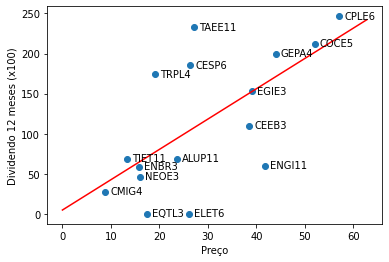

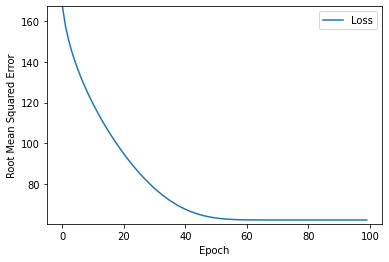

In [10]:
learning_rate=0.1
epochs=100
my_batch_size=16

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Resultados

Conforme pode ser observado nos gráficos acima, existe uma relação direta e linear entre a cotação das ações e o total de dividendos pagos pelas respectivas empresas aos acionistas. As ações que pagam mais dividendos tendem a ser negociadas a valores superiores àquelas que pagam menos dividendos. Em média, o valor pago em dividendo representa em torno de 4,5% da cotação da ação.

Contudo, podemos observar que algumas ações distanciam-se da reta que modela os dados. Ou seja, para algumas ações o erro entre o valor real e o predito é maior. Dessas, TRPL4, TAEE11 e CESP6 destacam-se por estarem acima da reta. Nesse contexto, isso significa que essas 3 ações são as que apresentam *Dividend yield* mais atrativo, pois a porcentagem retornada ao acionista pelo preço pago pelas ações é maior. O *Dividend yield* de TRPL4, TAEE11 e CESP6 são os maiores do grupo de ações avaliado, sendo 9,11%, 8,58%, 7,02%, respectivamente.

O segundo gráfico exibido acima mostra o Erro Quadrático Médio diminuindo a cada iteração do algoritmo, tendendo a zero quando um ponto ótimo é encontrado.

# Conclusão



O presente trabalho apresentou a utilização de *Linear Regression* no contexto de análise do *Dividend yield* de ações de empresas do setor elétrico listadas na B3.

Ademais, o presente trabalho demonstrou a utilização das bibliotecas TensorFlow, Keras e Pandas na ferramenta Google Colaboratory.

Possíveis continuações do presente trabalho:
* Testar o algoritmo com diferentes valores para os parâmetros *epoch*, *learning rate* e *batch size*.
* Testar a relação entre outras métricas das ações. Por exemplo, a relação entre a cotação e o lucro da empresa.
* Testar o algoritmo com mais de uma variável independente. Por exemplo, avaliar a cotação das ações em relação ao lucro e também ao nível de endividamento da empresa.



# Referências




* [1] http://www.b3.com.br/pt_br/noticias/pessoa-fisica.htm
* [2] https://www.sunoresearch.com.br/artigos/investir-em-dividendos/
* [3] https://www.schwab.com/active-trader/insights/content/dividend-yield-and-dividend-growth-fundamental-value-analytics
* [4] https://www.youtube.com/watch?v=ARHsj34MDKw
* [5] https://www.sunoresearch.com.br/artigos/dividendos/#9
* [6] https://www.sunoresearch.com.br/artigos/resenha-de-livro-faca-fortuna-com-acoes-antes-que-seja-tarde-de-decio-bazin/
* [7] https://exame.com/mercados/louise-barsi-ensina-como-investir-como-o-pai-bilionario/
* [8] http://www.b3.com.br
* [9] https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/
* [10] https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
* [11] https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc
* [12] https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
* [13] https://www.deeplearningbook.org/
* [14] https://developers.google.com/machine-learning/crash-course/ml-intro
* [15] https://www.machinelearningmindset.com/linear-regression-with-tensorflow/
* [16] https://www.tensorflow.org/
* [17] https://keras.io/
* [18] https://pandas.pydata.org/
* [19] https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=OwuxHmxllTwN
* [20] https://colab.research.google.com/github/google/eng-edu/blob/master/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb?hl=en
* [21] https://developers.google.com/machine-learning/glossary/#matplotlib
* [22] https://developers.google.com/machine-learning/glossary/#loss_curve
* [23] https://statusinvest.com.br
* [24] https://developers.google.com/machine-learning/glossary/#learning_rate
* [25] https://developers.google.com/machine-learning/glossary/#epoch
* [26] https://developers.google.com/machine-learning/glossary/#batch_size
